# FOSSIL Benchmarks

This notebook serves as a demonstration of the tool benchmarks. A set seed is used for repeatability.

[FOSSIL-playground](FOSSIL-playground.ipynb).

## Lyapunov Function Benchmarks
1. ### [Nonpoly 0](#non-poly0)
1. ### [Nonpoly 1](#non-poly1)
1. ### [Nonpoly 2](#non-poly3)
1. ### [Nonpoly 3](#non-poly3)
1. ### [Poly 1](#poly1)
1. ### [Poly 2](#poly2)
1. ### [Poly 3](#poly3)
1. ### [Poly 4](#poly4)
1. ### [Hybrid Lyapunov](#hi-lyap)

## Barrier Function Benchmarks
1. ### [Barrier 1](#darboux)
1. ### [Barrier 2](#elementary)
1. ### [Barrier 3](#obstacle)
1. ### [Barrier 4](#polynomial)
1. ### [Hybrid Barrier](#hybrid)
1. ### [Hi-Ord4](#hi-ord4)
1. ### [Hi-Ord6](#hi-ord6)
1. ### [Hi-Ord8](#hi-ord8)

In [1]:
# % Imports
import sys
sys.path.append('..')
from experiments.playground_utils import *
from experiments.benchmarks.benchmarks_bc import *
from experiments.benchmarks.benchmarks_lyap import twod_hybrid as hy_lyap 
from src.plots.plot_lyap import plot_lyapunov_fcn
from src.plots.plot_barriers import *

<a id='non-poly0'></a> 
## Non-poly 0

\begin{cases}
\dot{x} =  -x+xy, 
\\
\dot{y} =  -y, 
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 6.132940292358398 - acc: 58.6 %
  regulariser   0
Candidate: (pow(( - 0.247 * x0 - 0.689 * x1), 2) + pow(( - 0.134 * x0 + 1.241 * x1), 2))
  verifier   0
No counterexamples found!
  trajectoriser   0


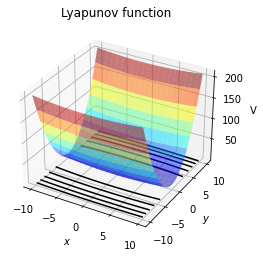

In [2]:
torch.manual_seed(167)
N_Dimensions = 2

x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 + x0 * x1,
    -x1
]
activations =  [ActivationType.SQUARE]
neurons = [2] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons,   CegisConfig.POSITIVE_DOMAIN.k:True,
              CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01,CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(-1,1)
plot_lyapunov_fcn(x, f_s, dynamics)

<a id='non-poly1'></a> 
## Non-poly 1

\begin{cases}
\dot{x} = -x + 2x^2y \\
\dot{y} = - y, 
\end{cases}


Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 842.2959594726562 - acc: 45.0 %
  regulariser   0
Candidate: (... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ...)*
...
  verifier   0
No counterexamples found!
  trajectoriser   0


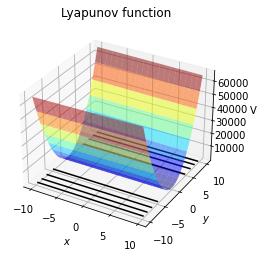

In [3]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 +2*x0**2 * x1,
    -x1
]
activations =  [ActivationType.LINEAR, ActivationType.SQUARE]
neurons = [20, 20] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(-1,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='non-poly2'></a> 
## Non-poly 2
\begin{cases}
\dot{x} = -x \\
\dot{y} = - 2y + 0.1 x y^2 + z \\
\dot{z} = -z -1.5 y, 
\end{cases}

In [4]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -x0,
    -2*x1 + 0.1*x0*x1**2 + x2,
    -x2 - 1.5*x1
]
activations =  [ActivationType.LINEAR, ActivationType.SQUARE]
neurons = [10, 10]
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons,
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False,
              CegisConfig.BATCH_SIZE.k: 750}
 
mode = PrimerMode.LYAPUNOV
f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 64921.2890625 - acc: 65.6 %
  regulariser   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
No counterexamples found!
  trajectoriser   0


<a id='non-poly3'></a> 
## Non-poly 3
\begin{cases}
\dot{x} = -3x -0.1 x y^3 \\
\dot{y} = - y + z \\
\dot{z} = -z.  
\end{cases} 

In [5]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -3*x0 - 0.1*x0*x1**3,
    -x1 + x2,
    -x2
]
activations =  [ActivationType.SQUARE]
neurons = [3] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons,
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 0.03274596109986305 - acc: 99.2 %
  regulariser   0
Candidate: (1*
 (4959999918937683/10000000000000000*x0 +
  30300000309944153/100000000000000000*x1 +
  -800000037997961/12500000000000000*x2 +
  0)**
 2 +
 1*
 (289000004529953/500000000000000*x0 +
  182499997317791/312500000000000*x1 +
  11699999868869781/100000000000000000*x2 +
  0)**
 2 +
 1*
 (-257999986410141/500000000000000*x0 +
  3319999873638153/10000000000000000*x1 +
  -8059999942779541/20000000000000000*x2 +
  0)**
 2)*
1
  verifier   0
No counterexamples found!
  trajectoriser   0


<a id='poly1'></a> 
## Poly 1
\begin{cases}
\dot{x} = - x^3 - x z^2, \\
\dot{y} = -y - x^2 x_1, 
\\
\dot{z} = -z - \dfrac{3 z}{z^2 + 1} + 3 x^2 z.
\end{cases} 

Note that $ z^2 + 1 > 0$

In [6]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = dynamics = [
    -x0**3 - x0*x2**2,
    -x1 - x0**2 * x1,
    -x2 - 3*x2 + 3*x0**2*x2
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k: VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations,
              CegisConfig.N_HIDDEN_NEURONS.k: neurons,
              CegisConfig.LLO.k: True, CegisConfig.SP_HANDLE.k: False, CegisConfig.N_VARS.k: 3}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10.0, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 218484.53125 - acc: 80.8 %
  regulariser   0
Candidate: (pow(( - 1.405 * x0 + 0.615 * x1 + 0.154 * x2), 2) + pow((0.427 * x0 - 0.037 * x1 - 0.097 * x2), 2) + pow((0.647 * x0 - 0.957 * x1 + 0.389 * x2), 2) + pow((0.884 * x0 + 0.973 * x1 - 0.084 * x2), 2) + pow((0.914 * x0 + 0.524 * x1 + 0.05 * x2), 2))
  verifier   0
No counterexamples found!
  trajectoriser   0


<a id='poly2'></a> 
## Poly 2
\begin{cases}
\dot{x} = - x^3 + y &  \\
 \dot{y} = -x -y. & 
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 0.19706036150455475 - acc: 98.0 %
100 - loss: -0.009979259222745895 - acc: 99.8 %
  regulariser   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
Counterexample Found: [x1 = 15399999916553497/1134399986267089840, x0 = 1/8]
V(ctx) =  16531986869321863561475727260840296569414642291652829/200000000000000000000000000000000000000000000000000000
Vdot(ctx) =  2384337467483783415331766742991303732467181581020171/100000000000000000000000000000000000000000000000000000
  trajectoriser   0
  learner   1
0 - loss: -0.008435092866420746 - acc: 95.84905660377359 %
100 - loss: -0.008461140096187592 - acc: 95.66037735849056 %
200 - loss: -0.009162310510873795 - acc: 95.66037735849056 %
300 - loss: -0.010512243025004864 - acc: 98.49056603773585 %
400 - loss: -0.012692670337855816 - acc: 99.62264150943396 %
500 - loss: -0.01657525822520256 - acc: 99.05660377358491 %
600 - loss: -0.0238529052585

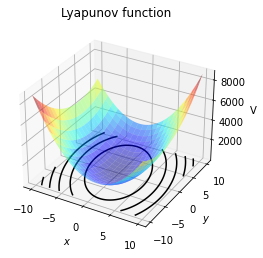

In [7]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -x0**3 + x1,
    -x0 - x1
]
activations =  [ActivationType.SQUARE]
neurons = [10] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False
             }

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='poly3'></a>
## Poly 3
\begin{cases}
\dot{x}= -x^3 - y^2, 
\\
\dot{y}= xy - y^3.
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: -0.022793594747781754 - acc: 98.2 %
100 - loss: -0.04695495590567589 - acc: 99.4 %
200 - loss: -0.13327498733997345 - acc: 99.4 %
300 - loss: -0.019326146692037582 - acc: 99.6 %
400 - loss: -0.019243473187088966 - acc: 99.6 %
500 - loss: -0.019800059497356415 - acc: 99.6 %
600 - loss: -0.02103370614349842 - acc: 99.6 %
700 - loss: -0.023059412837028503 - acc: 99.8 %
800 - loss: -0.026062848046422005 - acc: 99.8 %
900 - loss: -0.030179280787706375 - acc: 99.8 %
999 - loss: -0.035891979932785034 - acc: 99.8 %
  regulariser   0
Candidate: (pow(( - 17.937 * x0 + 5.61 * x1), 2) + pow(( - 14.854 * x0 + 16.063 * x1), 2) + pow(( - 12.054 * x0 - 13.938 * x1), 2) + pow(( - 8.87 * x0 + 13.038 * x1), 2) + pow((15.193 * x0 + 10.431 * x1), 2))
  verifier   0
Counterexample Found: x0 : [-0.02136730468750000847, -0.02135730468750000541]
x1 : [0.09917705294543850691, 0.09918705294543851692]
V(ctx) =  8.5004169030011543
Vdot(ctx) =  0.18

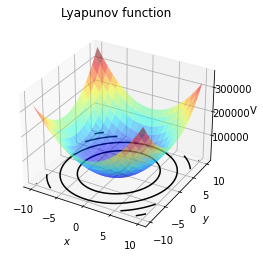

In [8]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0**3 -x1**2,
    x0*x1 - x1**3
    
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS = 0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='poly4'></a>
## Poly 4
\begin{cases}
\dot{x}= - x - 1.5 x^2 y^3,
\\
\dot{y}=-y^3 + 0.5x^3 y^2.
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 341.4746398925781 - acc: 80.4 %
  regulariser   0
Candidate: (pow(( - 0.117 * x0 - 0.075 * x1), 2) + pow((0.071 * x0 - 0.385 * x1), 2) + pow((0.176 * x0 + 0.494 * x1), 2) + pow((0.351 * x0 - 0.57 * x1), 2) + pow((0.362 * x0 + 0.337 * x1), 2))
  verifier   0
Counterexample Found: x0 : [-5.007844605837227903, -5.007834605837228281]
x1 : [4.338579298256027172, 4.338589298256026794]
V(ctx) =  23.786750697107738
Vdot(ctx) =  301.69735473264154
  trajectoriser   0
  learner   1
0 - loss: 215.2579803466797 - acc: 81.80076628352491 %
  regulariser   1
Candidate: (pow(( - 0.018 * x0 - 0.065 * x1), 2) + pow((0.009 * x0 - 0.156 * x1), 2) + pow((0.119 * x0 + 0.352 * x1), 2) + pow((0.224 * x0 + 0.246 * x1), 2) + pow((0.248 * x0 - 0.409 * x1), 2))
  verifier   1
No counterexamples found!
  trajectoriser   1


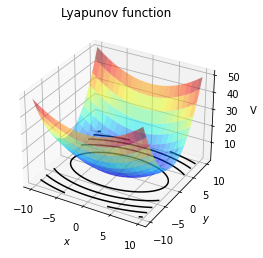

In [9]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 - 1.5*x0**2*x1**3,
    -x1**3 + 0.5*x0**3*x1**2
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS = 0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='hy-lyap'></a> 
## Hybrid Lyapunov

$$ f(x, y) = 
\begin{cases}
f_1 & \text{if } y < 0, \\
f_2 & \text{otherwise},
\end{cases}$$

where 

$$f_1 = 
\begin{cases}
\dot{x} = -x, \\
\dot{y} = - y - 0.5 x^3, \\
\end{cases}$$

$$f_2 = 
\begin{cases}
\dot{x} = -x, \\
\dot{y} =  -y -x^2 - 0.25 y^3, \\
\end{cases}$$


  learner   0
0 - loss: 785.2838745117188 - acc: 68.4 %
  regulariser   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
No counterexamples found!
  trajectoriser   0


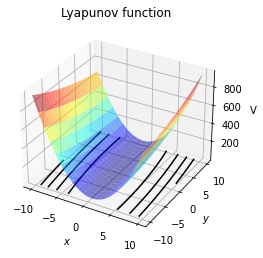

In [10]:
torch.manual_seed(167)
dynamics = hy_lyap
dimension = 2
activations =  [ActivationType.SQUARE]
neurons = [10]
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.N_VARS.k: dimension, CegisConfig.VERIFIER.k: VerifierType.Z3, 
              CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.SP_HANDLE.k: False, CegisConfig.SP_SIMPLIFY.k: False,
              CegisConfig.LLO.k: True, CegisConfig.BATCH_SIZE.k: 1000}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

# Barrier Function Benchmarks

<a id='darboux'></a>
## Barrier 1

$$ \begin{cases} \dot{x} = y + 2xy  \\ \dot{y} = -x - y^2 + 2x^2 \end{cases}$$

$$\begin{align*}
& X = \{ -2 \leq x, y \leq 2 \}, \\
& X_0 =  \{ 0 \leq x \leq 1, 1 \leq y \leq 2 \}, \\
& X_u = \{ x+y^2 \leq 0 \}
\end{align*}$$


../experiments/benchmarks/benchmarks_bc.py:151: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx = torch.nonzero(dom[:, 0] + dom[:, 1]**2 <= 0)


  learner   0
0 - loss: 0.42146408557891846 - accuracy init-unsafe: 0.0 - accuracy belt: 13.114754098360656 - points in belt: 427
100 - loss: -5.259627342224121 - accuracy init-unsafe: 100.0 - accuracy belt: 87.64044943820225 - points in belt: 178
200 - loss: -5.25543737411499 - accuracy init-unsafe: 100.0 - accuracy belt: 87.57062146892656 - points in belt: 177
300 - loss: -5.255436897277832 - accuracy init-unsafe: 100.0 - accuracy belt: 87.57062146892656 - points in belt: 177
400 - loss: -5.25543737411499 - accuracy init-unsafe: 100.0 - accuracy belt: 87.57062146892656 - points in belt: 177
500 - loss: -5.255436420440674 - accuracy init-unsafe: 100.0 - accuracy belt: 87.57062146892656 - points in belt: 177
600 - loss: -5.567739963531494 - accuracy init-unsafe: 100.0 - accuracy belt: 92.77566539923954 - points in belt: 263
700 - loss: -5.61606502532959 - accuracy init-unsafe: 100.0 - accuracy belt: 93.58108108108108 - points in belt: 296
800 - loss: -5.617362022399902 - accuracy init-

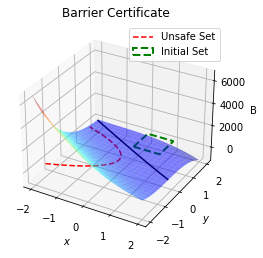

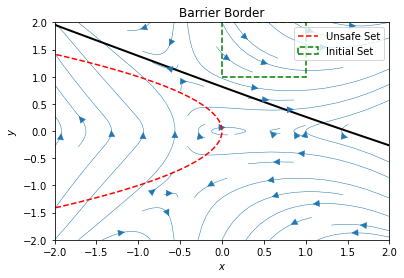

In [11]:
torch.manual_seed(167)
dynamics = barr_1
dimension = 2
activations =  [ActivationType.LINEAR, ActivationType.LIN_TO_CUBIC, ActivationType.LINEAR]
neurons = [10] * len(activations)
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k: verifier_type, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.N_VARS.k: dimension}

mode = PrimerMode.BARRIER

f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)
x = np.array([initialise_states(2)]).reshape(-1,1)
plot_darboux_bench(x, f_s)

<a id='elementary'></a>
## Barrier 2

$$\begin{cases}
\dot{x} = e^{-x} + y - 1 \\
\dot{y} = - \sin^2 x
\end{cases}$$

$$\begin{align*}
& X = \{-2 \leq x, y  \leq 2 \} \\ 
& X_0 = \{(x+0.5)^2+(y - 0.5)^2 \leq 0.16 \} \\ 
& X_u  = \{ (x - 0.7)^2+(y+0.7)^2 \leq 0.09 \}
\end{align*}$$




  learner   0
0 - loss: -0.16231369972229004 - accuracy init-unsafe: 100.0 - accuracy belt: 33.75 - points in belt: 80


/home/andffo/PycharmProjects/LRNN/venv/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


  regulariser   0
Candidate: (1.474 * tanh((-2.752000093460083 - 2.0409998893737793 * x0 + 0.64300000667572021 * x1)) + 0.92400002479553223 * tanh((-2.1050000190734863 + 1.3700000047683716 * x0 + 0.25 * x1)) - 1.5609999895095825 * tanh((-2.0950000286102295 + 0.67799997329711914 * x0 + 2.8989999294281006 * x1)) - 1.5080000162124634 * tanh((-2.0569999217987061 + 0.19699999690055847 * x0 + 1.5299999713897705 * x1)) + 0.55900001525878906 * tanh((-1.2389999628067017 + 0.75300002098083496 * x0 - 0.17499999701976776 * x1)) + 0.22100000083446503 * tanh((-0.61000001430511475 - 0.46900001168251038 * x0 + 1.7150000333786011 * x1)) - 0.093000002205371857 * tanh((-0.15399999916553497 - 0.22100000083446503 * x0 - 0.23399999737739563 * x1)) + 1.7419999837875366 * tanh((-0.0060000000521540642 - 0.84700000286102295 * x0 - 2.9639999866485596 * x1)) + 0.085000000894069672 * tanh((0.23199999332427979 + 0.49700000882148743 * x0 + 0.25299999117851257 * x1)) - 1.1039999723434448 * tanh((2.0150001049041748 - 

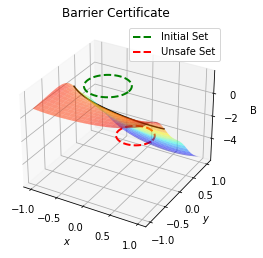

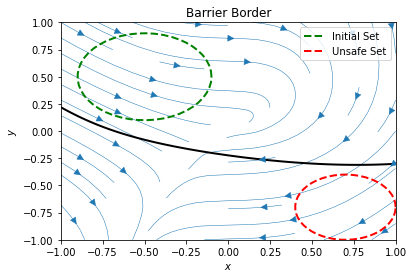

In [2]:
torch.manual_seed(167)
dynamics = barr_2
dimension = 2
activations =  [ActivationType.TANH]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations,
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SP_HANDLE.k:False, 
              CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.SYMMETRIC_BELT.k: False,}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

x = np.array([initialise_states(2)]).reshape(-1,1)
plot_exponential_bench(x, f_s)

<a id='obstacle'></a>
## Barrier 3

$$\begin{cases}
\dot{x} = v \sin \varphi \newline
\dot{y} = v \cos \varphi \newline
\dot{\varphi} = u, \quad \textrm{ where } \quad u = - \sin \varphi + 3 \cdot \frac{x \sin \varphi + y \cos \varphi}{0.5 + x^2 + y^2}
\end{cases}$$


$$\begin{align*}
& X = \{ -2 \leq x,y \leq 2,-\frac{\pi}{2}< \varphi < \frac{\pi}{2} \} \\
& X_0 = \{ -0.1 \leq x \leq 0.1, - 2 \leq y \leq -1.8,-\frac{\pi}{6}< \varphi< \frac{\pi}{6} \} \\
& X_u = \{ x^2+ y^2  \leq 0.04 \} 
\end{align*}$$



In [13]:
torch.manual_seed(167)

dynamics = barr_3
dimension = 3
activations =  [ActivationType.LIN_SQUARE]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.N_VARS.k: dimension,
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, DIMENSION=dimension, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: 0.10883829742670059 - accuracy init-unsafe: 21.3 - accuracy belt: 40.0 - points in belt: 65
100 - loss: -5.7823286056518555 - accuracy init-unsafe: 100.0 - accuracy belt: 96.35416666666667 - points in belt: 192
200 - loss: -5.777656078338623 - accuracy init-unsafe: 100.0 - accuracy belt: 96.27659574468085 - points in belt: 188
300 - loss: -5.768944263458252 - accuracy init-unsafe: 100.0 - accuracy belt: 96.13259668508287 - points in belt: 181
400 - loss: -5.763665676116943 - accuracy init-unsafe: 100.0 - accuracy belt: 96.045197740113 - points in belt: 177
500 - loss: -5.822210788726807 - accuracy init-unsafe: 100.0 - accuracy belt: 97.11934156378601 - points in belt: 243
600 - loss: -5.93098783493042 - accuracy init-unsafe: 100.0 - accuracy belt: 98.83040935672514 - points in belt: 342
700 - loss: -5.9303998947143555 - accuracy init-unsafe: 100.0 - accuracy belt: 98.82005899705015 - points in belt: 339
800 - loss: -5.928433895111084 - accuracy init-unsafe: 100.

<a id='polynomial'></a>
## Barrier 4


$$ \begin{cases} \dot{x} = y  \\ \dot{y} = -x - y + \frac{1}{3} x^3 \end{cases}$$


$$\begin{align*}
& X = \{ -3.5 \leq x \leq 2,-2 \leq y \leq 1 \} 
\\
& X_0 = \{ (x-1.5)^2+y^2 \leq 0.25 \vee 
(x \geq -1.8 \wedge x \leq -1.2 \wedge y \geq -0.1 \wedge y \leq 0.1) 
\\
& \qquad\qquad \vee  (x \geq -1.4 \wedge x \leq -1.2 \wedge y\geq -0.5\wedge y \leq 0.1) \}
 \\
& X_u = \{ (x+1)^2+(y+1)^2 \leq 0.16 \vee
(x\geq 0.4 \wedge x\leq 0.6 \wedge y \geq 0.1 \wedge y\leq 0.5) 
\\
& \qquad\qquad \vee (x \geq 0.4 \wedge x \leq 0.8 \wedge y \geq 0.1 \wedge y \leq 0.3) \}
\end{align*}$$


  learner   0
0 - loss: -0.029176950454711914 - accuracy init-unsafe: 32.04365079365079 - accuracy belt: 30.11305241521069 - points in belt: 973
100 - loss: -5.934685707092285 - accuracy init-unsafe: 99.35515873015873 - accuracy belt: 99.0791896869245 - points in belt: 543
  regulariser   0
Candidate: (0.879 * tanh((-3.377000093460083 + 0.8529999852180481 * x0 - 3.0610001087188721 * x1)) + 1.3350000381469727 * tanh((-3.2660000324249268 - 1.0460000038146973 * x0 + 2.7309999465942383 * x1)) - 0.19300000369548798 * tanh((-1.6289999485015869 - 0.47999998927116394 * x0 + 0.090999998152256012 * x1)) - 0.89600002765655518 * tanh((-1.6069999933242798 + 0.96399998664855957 * x0 + 0.13199999928474426 * x1)) - 1.1030000448226929 * tanh((-1.5219999551773071 + 1.031000018119812 * x0 + 0.10899999737739563 * x1)) + 1.0850000381469727 * tanh((-1.1720000505447388 - 3.0439999103546143 * x0 - 1.3140000104904175 * x1)) - 1.2730000019073486 * tanh((-1.034000039100647 - 0.80099999904632568 * x0 + 0.63499999

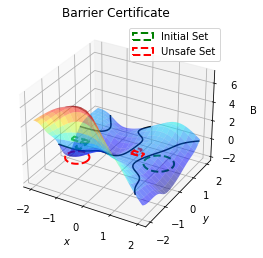

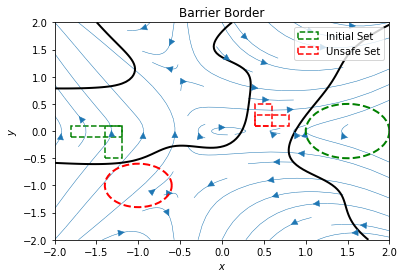

In [14]:
torch.manual_seed(167)
dynamics = barr_4

dimension = 2
activations =  [ActivationType.TANH]
neurons = [20] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.BATCH_SIZE.k: 1000, CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False,
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

x = np.array([initialise_states(2)]).reshape(-1,1)
plot_pjmod_bench(x, f_s)

<a id='hybrid'></a>
## Hybrid Barrier

$$
f_1 = 
\begin{cases}
\dot{x} = y \newline
\dot{y} = - x - 0.5 x^3 \newline
\end{cases}
\qquad
f_2 = 
\begin{cases}
\dot{x} = y \newline
\dot{y} =  x - 0.25 y^2 \newline
\end{cases}$$

$$ \text{Domain for } f_1 = \{ (x,y): x < 0 \} \qquad \text{Domain for } f_2 = \{ (x,y): x\geq 0 \}$$

$$\begin{align*}
& X = \{ x^2 + y^2 \leq 4 \} \\ 
& X_0 = \{ (x+1)^2 + (y+1)^2 \leq 0.25 \} \\ 
& X_u = \{ (x-1)^2 + (y-1)^2 \leq 0.25 \}
\end{align*}$$



In [15]:
torch.manual_seed(167)

dynamics = twod_hybrid
dimension = 2
activations =  [ActivationType.LIN_SQUARE]
neurons = [3] 
verifier_type = VerifierType.Z3

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: 0.07103799283504486 - accuracy init-unsafe: 29.3 - accuracy belt: 7.643312101910828 - points in belt: 314
100 - loss: -5.815310478210449 - accuracy init-unsafe: 100.0 - accuracy belt: 99.41520467836257 - points in belt: 342
200 - loss: -5.8463945388793945 - accuracy init-unsafe: 100.0 - accuracy belt: 99.69788519637463 - points in belt: 331
300 - loss: -5.857110500335693 - accuracy init-unsafe: 100.0 - accuracy belt: 99.6951219512195 - points in belt: 328
400 - loss: -5.858522891998291 - accuracy init-unsafe: 100.0 - accuracy belt: 99.6845425867508 - points in belt: 317
  regulariser   0
Candidate: (-10115000009536743/5000000000000000*
 (-4999999888241291/500000000000000000*x0 +
  -7854999899864197/5000000000000000*x1 +
  5665000081062317/2500000000000000) +
 -2634500026702881/500000000000000*
 (-105649995803833/50000000000000*x0 +
  -18194999694824219/5000000000000000*x1 +
  3501250147819519/1250000000000000)**
 2 +
 38529999256134033/10000000000000000*
 (-1269

<a id='hi-ord4'></a>
## Hi-Ord 4

$$\begin{align}
& 2273 x^{(4)} + 3980 x^{(3)} + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}$$

where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [16]:
torch.manual_seed(167)

dynamics = hi_ord_4
dimension = 4
activations =  [ActivationType.LINEAR]
neurons = [20] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension, CegisConfig.BATCH_SIZE.k: 1000,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True, CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -3.373413324356079 - accuracy init-unsafe: 98.05 - accuracy belt: 56.22568093385214 - points in belt: 514
100 - loss: -5.212804317474365 - accuracy init-unsafe: 100.0 - accuracy belt: 86.86006825938567 - points in belt: 586
200 - loss: -5.214147567749023 - accuracy init-unsafe: 100.0 - accuracy belt: 86.88245315161839 - points in belt: 587
300 - loss: -5.212803840637207 - accuracy init-unsafe: 100.0 - accuracy belt: 86.86006825938567 - points in belt: 586
400 - loss: -5.238133430480957 - accuracy init-unsafe: 100.0 - accuracy belt: 87.28222996515679 - points in belt: 574
500 - loss: -5.317925930023193 - accuracy init-unsafe: 100.0 - accuracy belt: 88.61209964412811 - points in belt: 562
600 - loss: -5.363837718963623 - accuracy init-unsafe: 100.0 - accuracy belt: 89.37728937728937 - points in belt: 546
700 - loss: -5.429237365722656 - accuracy init-unsafe: 100.0 - accuracy belt: 90.46728971962617 - points in belt: 535
800 - loss: -5.463032245635986 - accuracy in

Candidate: (-2.092599920516462 - 1.0708999689467253 * x0 - 1.0437000041559337 * x1 - 1.056399983881414 * x2 - 1.1172999597199269 * x3)
  verifier   2
No counterexamples found!
Certified!
  trajectoriser   2
Certified!
Learner times: total=61.8094194999976s,min=19.40645046499776s,max=21.65446990000055s,avg=20.603139833332534s
Regulariser times: total=0.35430934900432476s,min=0.10706749400196713s,max=0.13079817200195976s,avg=0.11810311633477492s
Verifier times: total=0.017470854003477143s,min=0.002887872000428615s,max=0.011353192003298318s,avg=0.005823618001159048s
Trajectoriser times: total=0.019012106000445783s,min=0.0012761250000039581s,max=0.017735981000441825s,avg=0.009506053000222892s


<a id='hi-ord6'></a>
## Hi-Ord 6

$$\begin{align}
& 170 x^{(6)} + 800 x^{(5)} + 2273 x^{(4)} + 3980 x^{(3)} 
\\ \nonumber
& + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}$$

where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [17]:
torch.manual_seed(167)

dynamics = hi_ord_6
dimension = 6
activations =  [ActivationType.LINEAR]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,   CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,        CegisConfig.BATCH_SIZE.k: 1000,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True,           CegisConfig.SP_SIMPLIFY.k:True, 
              CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -3.8546576499938965 - accuracy init-unsafe: 100.0 - accuracy belt: 64.27525622254758 - points in belt: 683
100 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
200 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
300 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
400 - loss: -5.869493007659912 - accuracy init-unsafe: 100.0 - accuracy belt: 97.8048780487805 - points in belt: 410
500 - loss: -5.855214595794678 - accuracy init-unsafe: 100.0 - accuracy belt: 97.5669099756691 - points in belt: 411
600 - loss: -5.8562726974487305 - accuracy init-unsafe: 100.0 - accuracy belt: 97.58454106280193 - points in belt: 414
700 - loss: -5.842926979064941 - accuracy init-unsafe: 100.0 - accuracy belt: 97.3621103117506 - points in belt: 417
800 - loss: -5.844057559967041 - accuracy 

<a id='hi-ord8'></a>
## Hi-Ord 8


\begin{align}
	& x^{(8)} + 20 x^{(7)} + 170 x^{(6)} + 800 x^{(5)} + 2273 x^{(4)} 
	\\ \nonumber 
	& \qquad + 3980 x^{(3)} + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}
where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [18]:
torch.manual_seed(167)

dynamics = hi_ord_8
dimension = 8
activations =  [ActivationType.LINEAR]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension, CegisConfig.BATCH_SIZE.k: 1000, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True, CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -2.765930652618408 - accuracy init-unsafe: 0.0 - accuracy belt: 54.936708860759495 - points in belt: 790
100 - loss: -5.618221282958984 - accuracy init-unsafe: 100.0 - accuracy belt: 93.61702127659575 - points in belt: 141
200 - loss: -5.620918273925781 - accuracy init-unsafe: 100.0 - accuracy belt: 93.66197183098592 - points in belt: 142
300 - loss: -5.628786563873291 - accuracy init-unsafe: 100.0 - accuracy belt: 93.79310344827586 - points in belt: 145
400 - loss: -5.633853435516357 - accuracy init-unsafe: 100.0 - accuracy belt: 93.87755102040816 - points in belt: 147
500 - loss: -5.559482097625732 - accuracy init-unsafe: 100.0 - accuracy belt: 92.63803680981596 - points in belt: 163
600 - loss: -5.623841285705566 - accuracy init-unsafe: 100.0 - accuracy belt: 93.71069182389937 - points in belt: 159
700 - loss: -5.663699626922607 - accuracy init-unsafe: 100.0 - accuracy belt: 94.375 - points in belt: 160
800 - loss: -5.689511299133301 - accuracy init-unsafe: 1